 1. installation les bibliothèques


In [66]:
!pip install seaborn
!pip install geopandas contextily

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------------------------- -------------- 12.1/19.2 MB 58.1 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 55.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 64.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 96.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   ------------------------- -------------- 16.0/25.5 MB 77.5 MB/s eta 0:00:01
   ---------------------------------------- 25.5/25.5 MB 64.4 MB/s eta 0:00:00

   -- -------------------------------------  1/15 [shapely]
   -- -------------------------------------  1/15 [shapely]
   -- -------------------------------------  1/15 [shapely]
   -- -------------------------------------  1/15 [shapely]
   ----- --

2. Importer les bibliothèques

In [67]:
import pandas as pd
import datetime
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
# Affichage plus lisible
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


3. Charger les données

In [45]:
data = pd.read_csv('C:\\Users\\hotsa\\Downloads\\datasets\\AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


4. Nettoyage des données

a. Supprimer les colonnes inutiles 

In [46]:
data = data.drop(['id','host_name'], axis=1)

b. Supprimer les valeurs manquantes

In [47]:
data.dropna(inplace=True)
data

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


c. Comprendre les données

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38837 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38837 non-null  object 
 1   host_id                         38837 non-null  int64  
 2   neighbourhood_group             38837 non-null  object 
 3   neighbourhood                   38837 non-null  object 
 4   latitude                        38837 non-null  float64
 5   longitude                       38837 non-null  float64
 6   room_type                       38837 non-null  object 
 7   price                           38837 non-null  int64  
 8   minimum_nights                  38837 non-null  int64  
 9   number_of_reviews               38837 non-null  int64  
 10  last_review                     38837 non-null  object 
 11  reviews_per_month               38837 non-null  float64
 12  calculated_host_listings_count  38837

In [49]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.883700e+04,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000
mean,6.424425e+07,40.728135,-73.951145,142.314442,5.868450,29.300976,1.373410,5.165100,114.882535
std,7.589301e+07,0.054993,0.046696,196.959053,17.386079,48.189167,1.680502,26.297646,129.537245
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033514e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [51]:
data.nunique()

name                              38269
host_id                           30245
neighbourhood_group                   5
neighbourhood                       218
latitude                          17443
longitude                         13640
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [52]:
data.drop_duplicates(inplace=True)
data

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


d. Vérifier les valeurs incohérentes

In [53]:
# Prix négatifs ?
data = data[data['price'] >= 0]

# Minimum nights trop élevés ?
data = data[data['minimum_nights'] <= 365]

# Nombre d’avis négatif ?
data = data[data['number_of_reviews'] >= 0]
data

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Lovely Privet Bedroom with Privet Restroom,83554966,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,No.2 with queen size bed,257683179,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,Seas The Moment,211644523,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,1B-1B apartment near by Metro,273841667,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


5. Analyse exploratoire des données

a. Distribution des prix

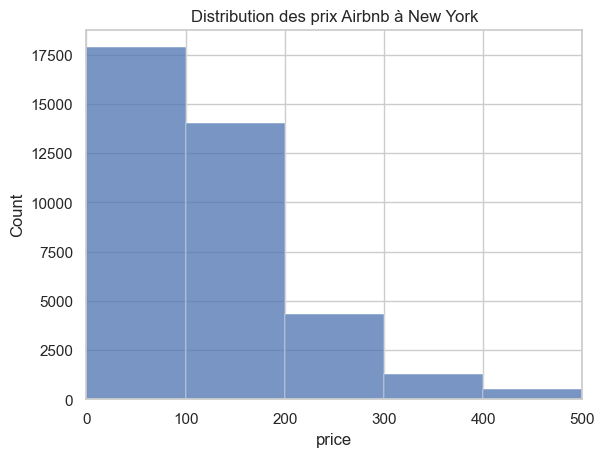

In [ ]:
sns.histplot(data['price'], bins=100, kde=False)
plt.xlim(0, 500)  # zoom sur des prix raisonnables
plt.title("Distribution des prix Airbnb à New York")
plt.show()

b. Nombre de logements par quartier

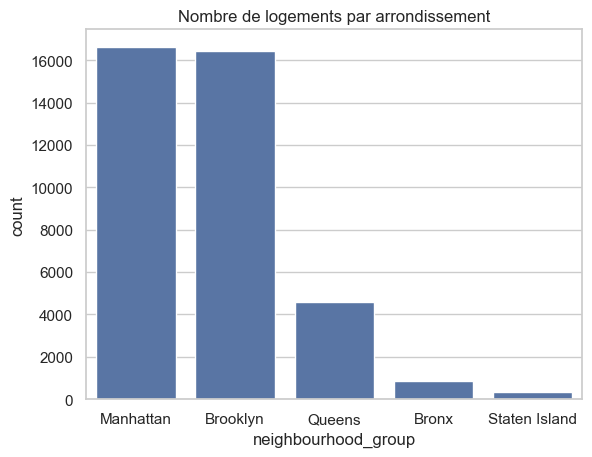

In [55]:
#Nombre de logements par quartier
sns.countplot(data=data, x='neighbourhood_group', order=data['neighbourhood_group'].value_counts().index)
plt.title("Nombre de logements par arrondissement")
plt.show()

c. Type de logement par quartier

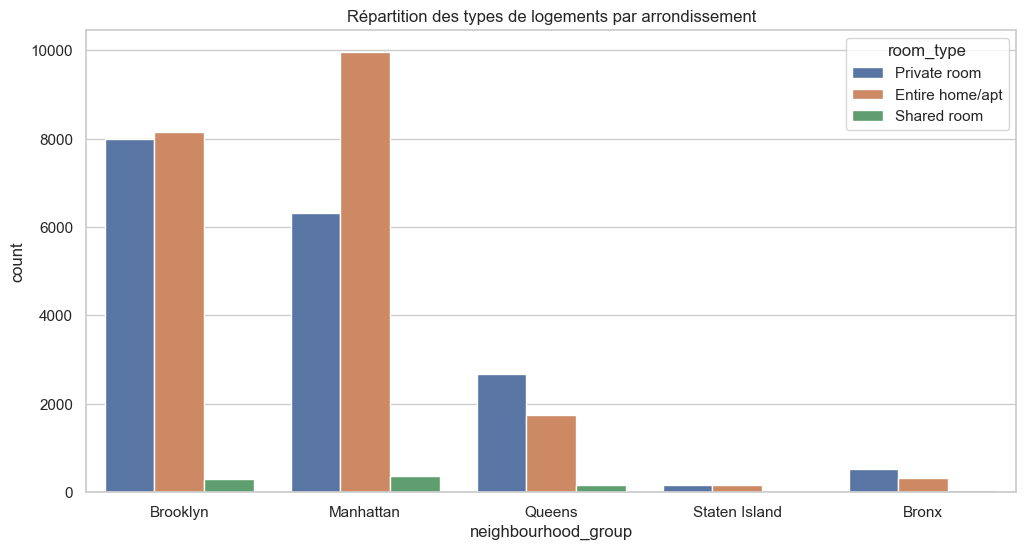

In [56]:
# Type de logement par quartier
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='neighbourhood_group', hue='room_type')
plt.title("Répartition des types de logements par arrondissement")
plt.show()

d. Corrélation entre variables numériques

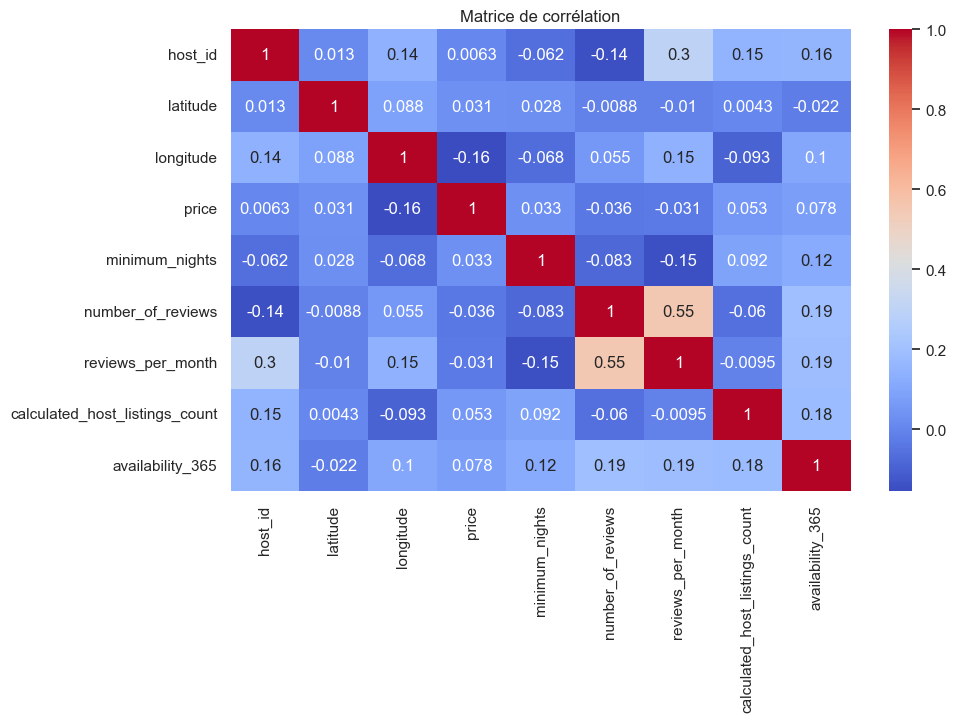

In [57]:
# d. Corrélation entre variables numériques
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show() 

e. Logements avec le plus de revenus potentiels

In [58]:
# e. Logements avec le plus de revenus potentiels
data['estimated_revenue'] = data['price'] * data['number_of_reviews']
top_hosts = data.sort_values(by='estimated_revenue', ascending=False).head(10)
top_hosts[['neighbourhood_group', 'room_type', 'estimated_revenue']]

,neighbourhood_group,room_type,estimated_revenue
2163,Manhattan,Entire home/apt,257025
30824,Manhattan,Entire home/apt,206310
9211,Manhattan,Entire home/apt,150450
13724,Manhattan,Entire home/apt,145404
10520,Brooklyn,Entire home/apt,140859
10431,Manhattan,Entire home/apt,130255
6107,Manhattan,Entire home/apt,130014
5801,Brooklyn,Entire home/apt,127050
1362,Brooklyn,Entire home/apt,125000
2844,Manhattan,Entire home/apt,119700


 6. Visualisation géographique

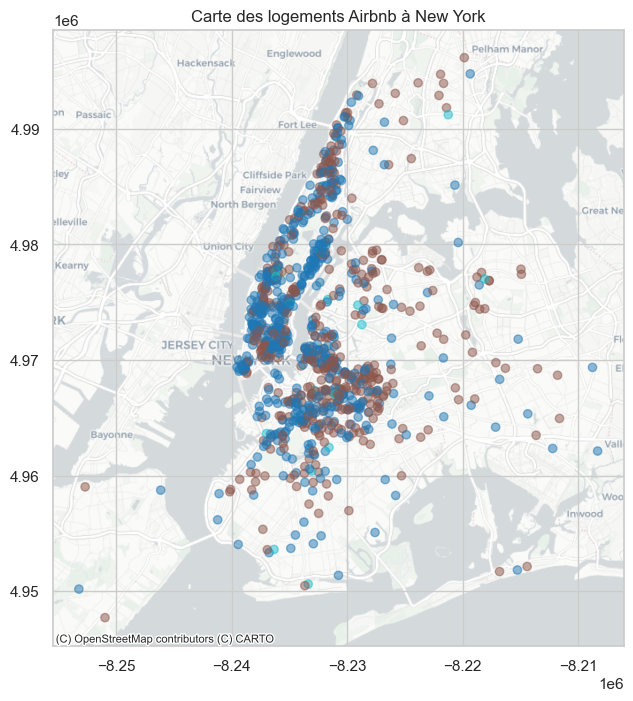

In [76]:
import geopandas as gpd
import contextily as ctx

# Échantillonner d'abord
sample_data = data.sample(1000)

# Créer les points géographiques à partir du sous-échantillon
gdf = gpd.GeoDataFrame(
    sample_data,
    geometry=gpd.points_from_xy(sample_data.longitude, sample_data.latitude),
    crs='EPSG:4326'
)

# Reprojeter pour fond de carte
gdf = gdf.to_crs(epsg=3857)

# Tracer la carte avec fond
ax = gdf.plot(figsize=(12, 8), alpha=0.5, column='room_type')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Carte des logements Airbnb à New York")
plt.show()

6. Exporter les données nettoyées:

In [80]:
data.to_csv("airbnb_nyc_clean.csv", index=False)